In [320]:
import numpy as np
import scipy
import GPy
import pandas as pd
import matplotlib.pyplot as plt

from datetime import datetime
%matplotlib inline

In [321]:
#10 synthetic patients, random ALS-FRS (4-40), known alignment (8 readings / 6mnths)
date_rng = pd.date_range(start='1/1/2020', end='7/1/2020', periods=8)

df = pd.DataFrame(date_rng, columns=['date'])

#Patients 0-4 have increasing 
for synthetic_patient in range(5): 
    patient_id = "patient" + str(synthetic_patient)
    df[patient_id] = np.random.randint(low=4,high=20,size=(len(date_rng)))
    #df[patient_id] = np.linspace(start=4,stop=20,num=8)

#Pateints 5-9 have decreasing
for synthetic_patient in range(5, 10):
    patient_id = "patient" + str(synthetic_patient)
    df[patient_id] = np.random.randint(low=20, high=40,size=(len(date_rng)))
    #df[patient_id] = np.linspace(start=20,stop=4,num=8)

df

,date,patient0,patient1,patient2,patient3,patient4,patient5,patient6,patient7,patient8,patient9
0,2020-01-01,11,14,8,4,15,27,22,26,21,38
1,2020-01-27,10,18,16,15,6,32,36,25,24,27
2,2020-02-22,14,9,6,7,11,36,34,21,21,21
3,2020-03-19,14,7,8,5,10,35,29,22,36,38
4,2020-04-14,4,17,19,11,15,35,34,21,32,37
5,2020-05-10,11,11,7,10,16,32,31,23,25,31
6,2020-06-05,19,15,5,5,9,28,36,29,33,20
7,2020-07-01,14,7,15,5,12,36,28,33,26,36


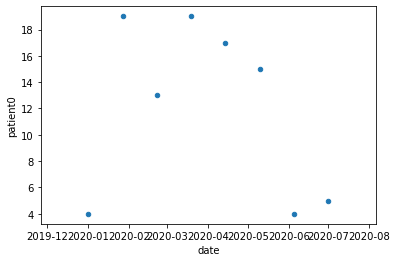

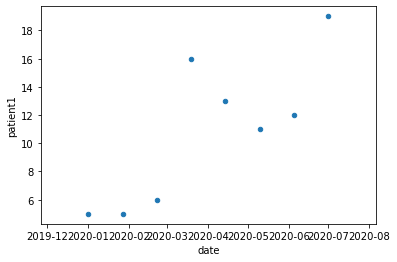

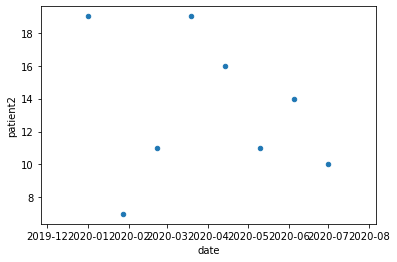

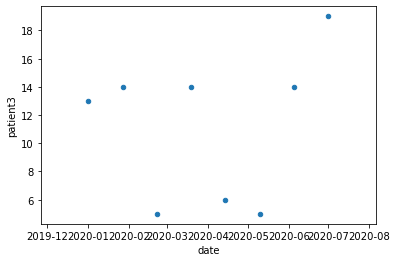

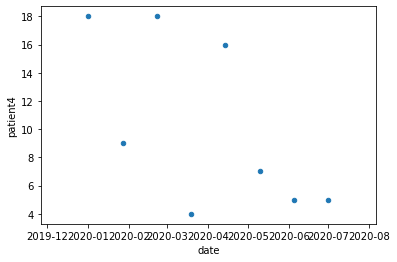

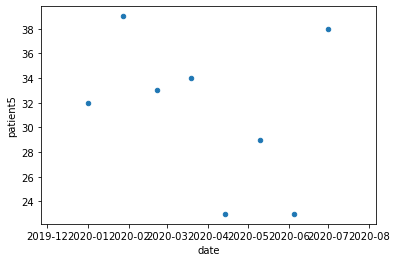

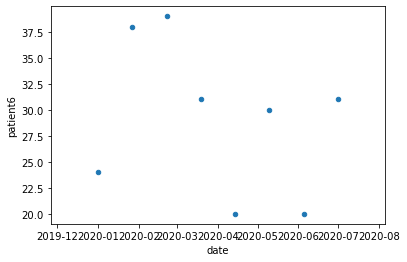

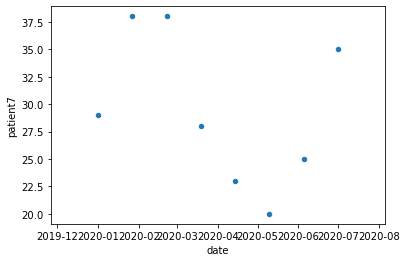

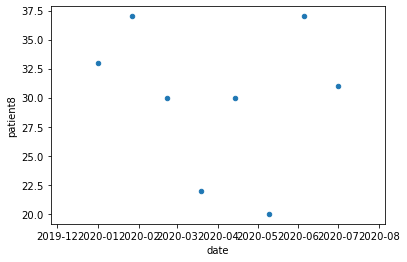

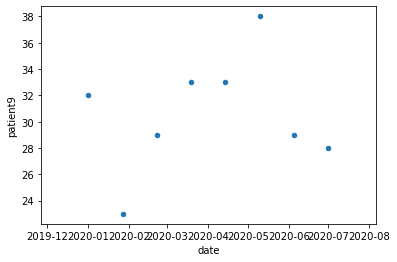

In [313]:
#ALS-FRS graph for each patient over time
for synthetic_patient in df.columns[1:]:
    df.plot(kind="scatter", x="date", y=synthetic_patient)

In [314]:
#Gaussian Process Regression on synthetic data, RBF kernel

k = GPy.kern.RBF(1)
k

rbf.,value,constraints,priors
variance,1.0,+ve,
lengthscale,1.0,+ve,


In [315]:
def datetimeToFloat(dt):
    return (dt - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')

In [318]:
#GPR model for patient0
X = df["date"].to_numpy().reshape((8,1))
Y = df["patient0"].to_numpy().reshape((8,1))

X = datetimeToFloat(X)
X = X/(24*3600)
print(X)

m = GPy.models.GPRegression(X, Y, k)
m.kern.lengthscale.fix(10)
m.optimize()

m
#TODO: log likelihood

[[18262.]
 [18288.]
 [18314.]
 [18340.]
 [18366.]
 [18392.]
 [18418.]
 [18444.]]


 c:\users\rob\appdata\local\programs\python\python38-32\lib\site-packages\paramz\transformations.py:111: RuntimeWarning:overflow encountered in expm1


GP_regression.,value,constraints,priors
rbf.variance,172.94304505612854,+ve,
rbf.lengthscale,10.0,+ve fixed,
Gaussian_noise.variance,8.157687857010216e-83,+ve,


{'dataplot': [<matplotlib.collections.PathCollection at 0x1f218f40>],
 'gpmean': [[<matplotlib.lines.Line2D at 0x1f231250>]],
 'gpconfidence': [<matplotlib.collections.PolyCollection at 0x1f231388>]}

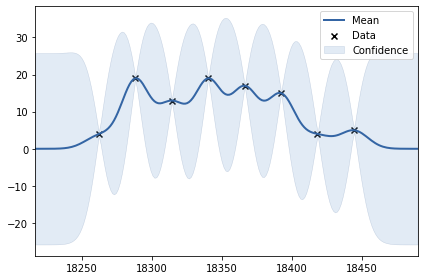

In [319]:
m.plot()

In [302]:
X
#Convert to numbers

array([[18262.],
       [18288.],
       [18314.],
       [18340.],
       [18366.],
       [18392.],
       [18418.],
       [18444.]])

In [303]:
Y

array([[20.        ],
       [17.71428571],
       [15.42857143],
       [13.14285714],
       [10.85714286],
       [ 8.57142857],
       [ 6.28571429],
       [ 4.        ]])